In [1]:
import scipy
import scipy.io.wavfile
from matplotlib.pyplot import specgram
import numpy as np

import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
import os

directory = [x.decode("UTF-8") for x in os.listdir('./dataset/')]


In [3]:
smokers_file = open('./smokers.txt')
smokers = smokers_file.read().decode("cp1251")
smokers_list = [x for x in smokers.split("\n") if len(x)>1]

SMOKERS = [x.split("|")[0].strip() for x in smokers_list]

In [4]:
nonsmokers_file = open('./nonsmokers.txt')
nonsmokers = nonsmokers_file.read().decode("cp1251")
nonsmokers_file.close()

nonsmokers_list = [x for x in nonsmokers.split("\n") if len(x)>1]

NONSMOKERS = [x.split("|")[0].strip() for x in nonsmokers_list]

In [5]:
SMOKERS

[u'BR\u0410_10-12-2015_11-58-45',
 u'CZA_09-12-2015_02-27-31',
 u'KNN_09-12-2015_13-16-17',
 u'PPV_10-12-2015_19-30-18',
 u'SAE_17-04-2015_10-54-55',
 u'ZLS_03-01-2015_22-10-47',
 u'\u0410\u0422\u0410_02-01-2015_21-39-50',
 u'\u0410\u0428\u041c_11-12-2015_11-46-02',
 u'\u0411\u0412\u0410_21-08-2015_10-26-22',
 u'\u0411\u0421\u0414_10-03-2015_20-18-56',
 u'\u0412\u041d\u041d_16-11-2014_18-00-32',
 u'\u0413\u0421\u0413_26-03-2015_15-04-38',
 u'\u0414\u0418\u0410_12-07-2015_20-41-28',
 u'\u0416\u04210_08-01-2015_20-48-56',
 u'\u0417\u0414\u0410_10-12-2015_10-46-42',
 u'\u0438\u0432\u043e_11-12-2015_15-03-29',
 u'\u0418\u0421\u041d_30-09-2015_15-02-25',
 u'\u041a\u0410\u0412_01-09-2015_13-04-18',
 u'\u041a\u0410\u0412_10-12-2015_12-41-21',
 u'\u041a\u0418\u0412_10-03-2015_13-32-18',
 u'\u041a\u041d\u041d_11-12-2015_14-55-45',
 u'\u041a\u041f\u042e_01-10-2015_17-02-02',
 u'\u041a\u0421\u041d_11-12-2015_14-34-00',
 u'\u041b\u0410\u0412_19-03-2015_14-47-39',
 u'\u041b\u041e0_11-03-2015_17-52-

In [6]:
smoking_wavs = []
nonsmoking_wavs = []

for smoker in SMOKERS:
    filename = [x for x in directory if x.startswith(smoker) 
                and x.endswith('wav') and not 'filtered' in x]
    smoking_wavs.append(filename)

In [7]:
for nonsmoker in NONSMOKERS:
    filename = [x for x in directory if x.startswith(nonsmoker) 
                and x.endswith('wav') and not 'filtered' in x]
    nonsmoking_wavs.append(filename)

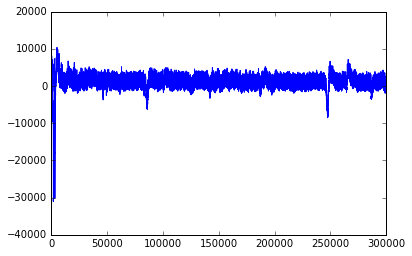

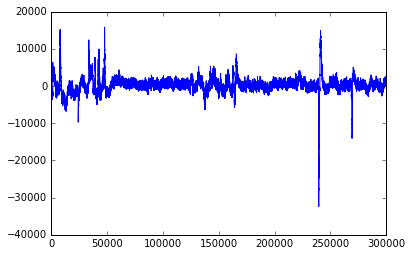

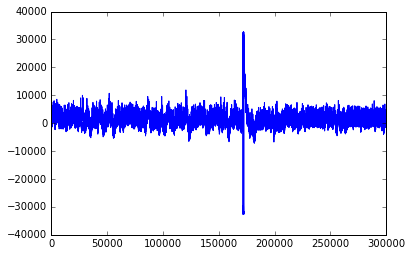

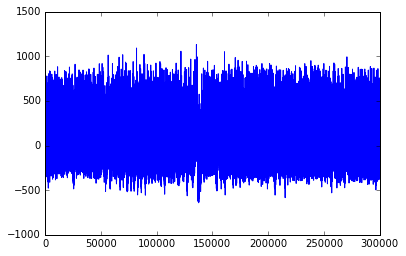

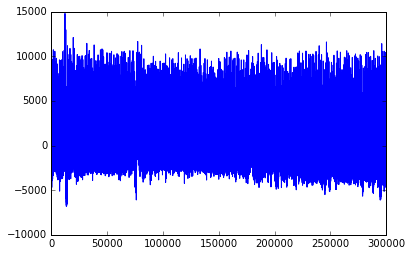

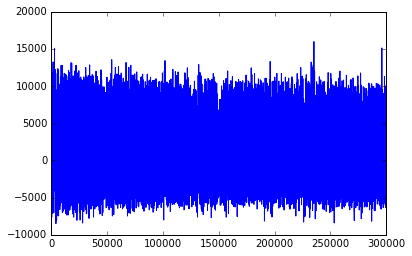

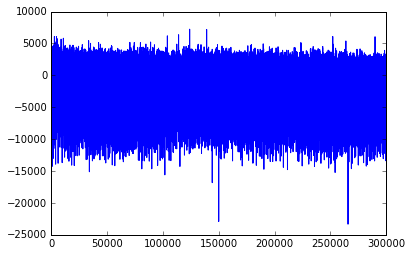

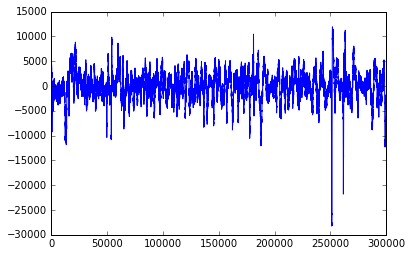

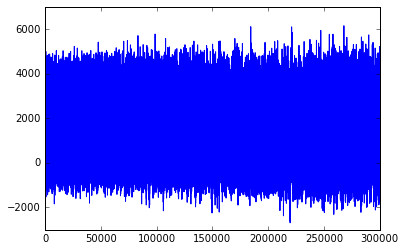

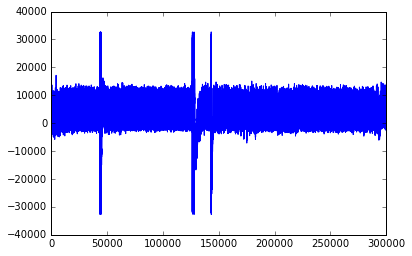

In [8]:
import scipy
import scipy.io.wavfile
from matplotlib.pyplot import specgram

for sm in smoking_wavs[:10]:
    sample_rate, X = scipy.io.wavfile.read('./dataset/%s' %sm[0])

    plt.plot(X)
    
    plt.show()
    



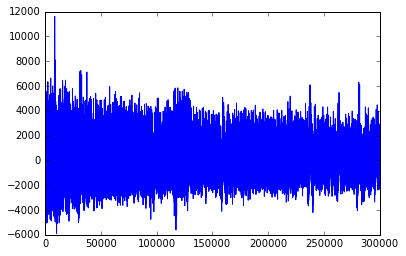

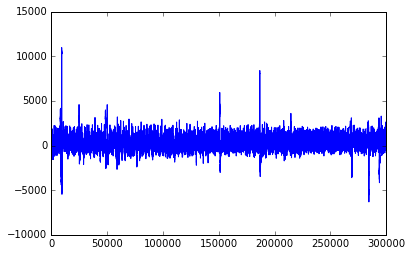

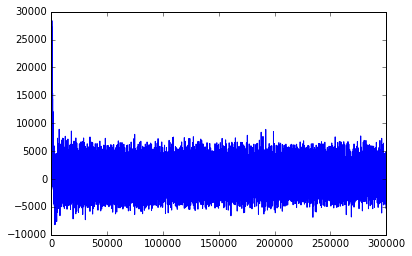

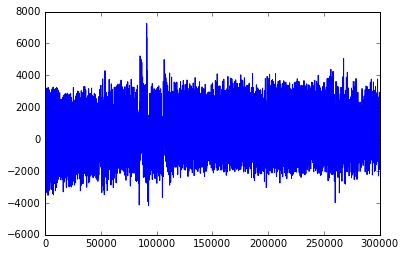

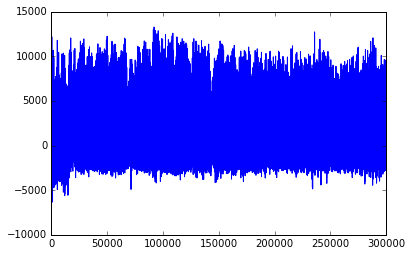

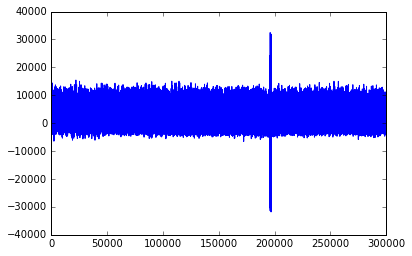

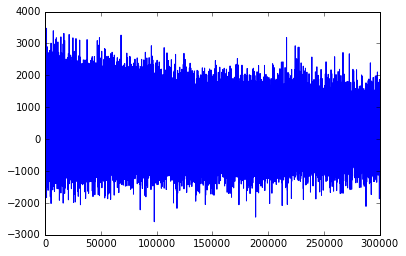

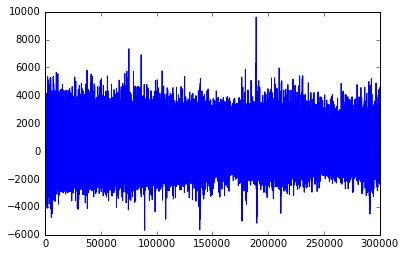

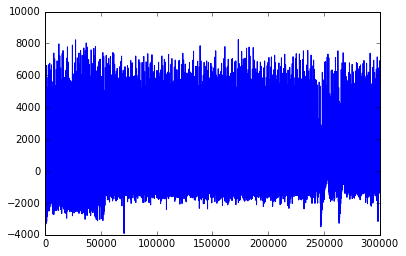

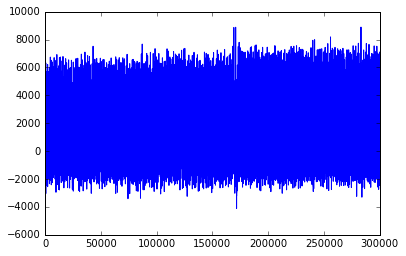

In [9]:
for sm in nonsmoking_wavs[:10]:
    sample_rate, X = scipy.io.wavfile.read('./dataset/%s' %sm[0])

    plt.plot(X)
    plt.show()

In [10]:
def fft(fn):
    sample_rate, X = scipy.io.wavfile.read('./dataset/%s' %fn[0])
    fft_features = scipy.fft(X)
    return fft_features

In [11]:
smokers_features = [fft(sm) for sm in smoking_wavs]

In [12]:
nonsmokers_features = [fft(nsm) for nsm in nonsmoking_wavs]

In [13]:
smokers_features[:10]

[array([ 28562518.00000000      +0.j        ,
          6787402.97733816-8527186.94485032j,
          7838937.31476831-6904718.43611073j, ...,
        -13517865.47653189+6894072.51183108j,
          7838937.31476839+6904718.43611063j,
          6787402.97733825+8527186.94485028j]),
 array([-13455869.00000000       +0.j        ,
        -29021127.13911096 -6142315.38647176j,
        -32851344.89261697 +6310893.42253797j, ...,
        -24702988.50437289-13712814.32194219j,
        -32851344.89261701 -6310893.42253775j,
        -29021127.13911086 +6142315.38647197j]),
 array([ 86283332.00000000       +0.j        ,
         15441883.75153947-28181928.01001977j,
         28826682.05747443  -679928.63767993j, ...,
        -19393838.67685213 +1214737.90787948j,
         28826682.05747439  +679928.63767969j,
         15441883.75153970+28181928.0100197j ]),
 array([ 566717.00000000     +0.j        ,
        -839685.61817973+265135.01615144j,
        -639558.40198499+355924.98015793j, ...,
     

/home/dasha/opt/anaconda/lib/python2.7/site-packages/numpy/core/numeric.py:474: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


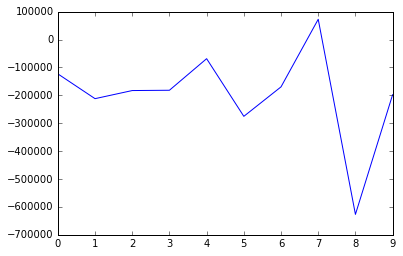

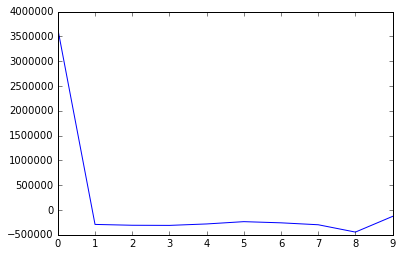

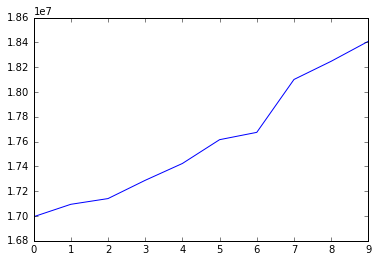

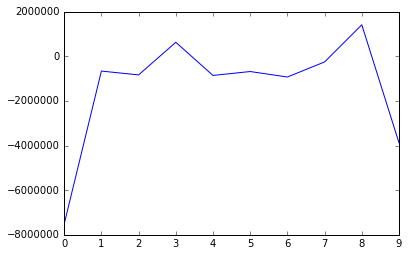

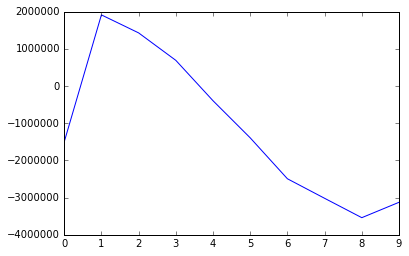

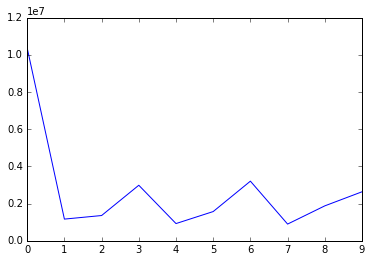

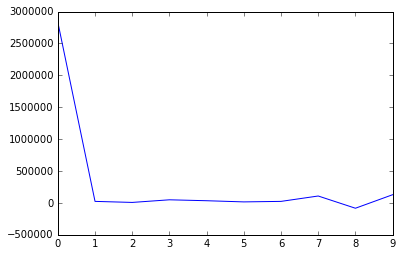

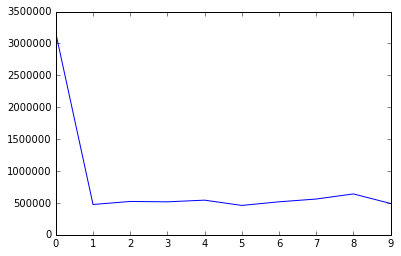

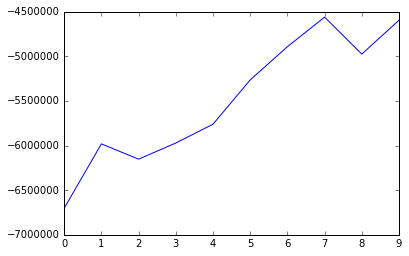

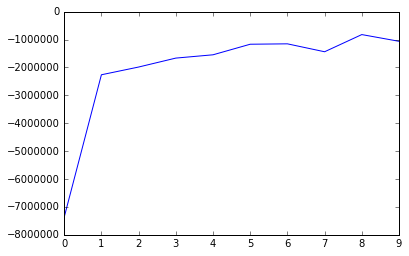

In [14]:
for X in nonsmokers_features[:10]:
    plt.plot(X[:10])
    plt.show()

In [15]:
testcount = np.array([[1,2],[4,5], [7,8]])

testwavs = np.ndarray(shape = (3,2))

for i in range(3):
    testwavs[i,:] = smokers_features[i][:2]

print testwavs
print testcount

newX = np.ndarray(shape = (3,4))

for i in range(3):
    newX[i, :2] = testwavs[i,:]
    newX[i, 2:] = testcount[i,:]
    
print newX

[[ 28562518.           6787402.97733816]
 [-13455869.         -29021127.13911096]
 [ 86283332.          15441883.75153947]]
[[1 2]
 [4 5]
 [7 8]]
[[  2.85625180e+07   6.78740298e+06   1.00000000e+00   2.00000000e+00]
 [ -1.34558690e+07  -2.90211271e+07   4.00000000e+00   5.00000000e+00]
 [  8.62833320e+07   1.54418838e+07   7.00000000e+00   8.00000000e+00]]


/home/dasha/opt/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:6: ComplexWarning: Casting complex values to real discards the imaginary part


In [16]:
import numpy as np

X = np.ndarray(shape = (100, 10))
Y = np.ndarray(shape = 100)

In [17]:
len(nonsmokers_features)

50

In [18]:
## smokers

for i in range(50):
    X[i,:10] = smokers_features[i][:10]
    Y[i] = 1
    
## nonsmokers

for i in range(50):
    X[i+50,:10] = nonsmokers_features[i][:10]
    Y[i+50] = 0

/home/dasha/opt/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:4: ComplexWarning: Casting complex values to real discards the imaginary part
/home/dasha/opt/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:10: ComplexWarning: Casting complex values to real discards the imaginary part


In [19]:
from sklearn.ensemble import RandomForestClassifier

lr = RandomForestClassifier()


In [20]:
from sklearn import cross_validation

for d in range(2,10):
    lr = RandomForestClassifier(max_depth = d)
    scores = cross_validation.cross_val_score(lr, X, Y, cv=10, scoring = "accuracy")
    print scores, scores.mean()

[ 0.6  0.6  0.7  0.8  0.5  0.7  0.5  0.8  0.5  0.9] 0.66
[ 0.5  0.7  0.6  0.9  0.5  0.7  0.5  0.8  0.6  0.9] 0.67
[ 0.6  0.7  0.6  0.7  0.4  0.8  0.6  0.7  0.7  0.7] 0.65
[ 0.5  0.7  0.6  0.7  0.5  0.7  0.5  0.7  0.7  0.6] 0.62
[ 0.3  0.7  0.6  0.7  0.6  0.6  0.5  0.8  0.6  0.9] 0.63
[ 0.3  0.6  0.7  0.7  0.6  0.6  0.6  0.7  0.8  0.9] 0.65
[ 0.2  0.6  0.7  0.6  0.7  0.6  0.7  0.7  0.7  0.8] 0.63
[ 0.3  0.5  0.6  0.6  0.5  0.6  0.5  0.6  0.7  0.7] 0.56


In [21]:
# reading testset

import os

test_directory = [x.decode("UTF-8") for x in os.listdir('./testset/')]

In [22]:
test_directory = [x[:23] for x in test_directory]

In [23]:
names = set(test_directory)
names = list(names)

test_directory = [x.decode("UTF-8") for x in os.listdir('./testset/')]

In [24]:
answers = []

lr = RandomForestClassifier(max_depth = 4).fit(X,Y)

for name in names:
    filename = [x for x in test_directory if x.startswith(name) 
                and x.endswith('wav') and not 'filtered' in x]
    sample_rate, Z = scipy.io.wavfile.read('./testset/%s' %filename[0])
    zfft = scipy.fft(Z)[:10]
    
    
    ### ADD COUNT FEATURES
    
    
    w = lr.predict(zfft.reshape(1,-1))
    answers.append((name, w))

/home/dasha/opt/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:373: ComplexWarning: Casting complex values to real discards the imaginary part
  array = np.array(array, dtype=dtype, order=order, copy=copy)


In [25]:
print answers[:10]

[(u'\u0433\u0430\u0434_08-12-2015_16-56-00', array([ 0.])), (u'\u0413\u042e\u041a_27-11-2015_17-10-16', array([ 1.])), (u'\u0418\u0421\u0418_14-12-2015_17-20-40', array([ 1.])), (u'\u0414\u0410\u0420_09-12-2015_12-02-49', array([ 1.])), (u'\u0421\u0418\u0412_18-12-2015_17-32-30', array([ 1.])), (u'\u041a\u0418\u0412_21-11-2015_21-25-03', array([ 1.])), (u'\u0422\u0414\u0422_07-12-2015_15-54-50', array([ 1.])), (u'\u0426\u0418\u0418_10-12-2015_14-20-08', array([ 0.])), (u'\u0421\u0421\u0410_27-11-2015_12-15-20', array([ 1.])), (u'\u0421\u0410\u0413_07-12-2015_12-07-17', array([ 0.]))]


In [26]:
answer_file = open("answers.csv", "w")

for name, label in answers:
    answer_file.write("{}, {} \n".format(name.encode("cp1251"), int(label[0])))
    
answer_file.close()